<a href="https://colab.research.google.com/github/zoya-ivanova/BigData/blob/main/SparkApache2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Spark Apache <br>
### Инструменты работы и визуализации

Условие: дана таблица с колонками (id, name, salary, managerId), студентам необходимо написать код на spark, <br>
который создаст эту таблицу (данные указаны ниже) и в результате выдаст таблицу в которой будут имена сотрудников, <br>
которые зарабатывают больше своих менеджеров.

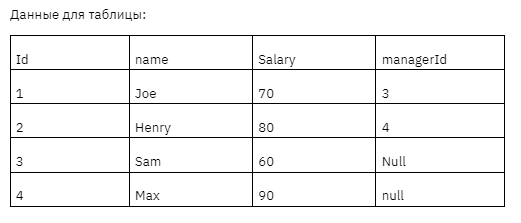



In [3]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=2b485f72274b377e33c1b8216996d4b20d853cce72e216a4f95d8053577ada73
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [8]:
# Импортируем модуль Apache Spark - Spark SQL
from pyspark.sql import SparkSession

In [6]:
# Создаем (инициализируем) SparkSession

spark = SparkSession.builder.appName("EmployeeSalaryComparison").getOrCreate()

In [15]:
#  Составляем data - лист из кортежей элементов таблицы
data = [(1, "Joe", 70, 3),
        (2, "Henry", 80, 4),
        (3, "Sam", 60, None),
        (4, "Max", 90, None)]

# Создаем DataFrame
df = spark.createDataFrame(data, ["Id", "name", "Salary", "managerId"])

# Выводим созданную таблицу
df.show()

+---+-----+------+---------+
| Id| name|Salary|managerId|
+---+-----+------+---------+
|  1|  Joe|    70|        3|
|  2|Henry|    80|        4|
|  3|  Sam|    60|     NULL|
|  4|  Max|    90|     NULL|
+---+-----+------+---------+



In [26]:
# Регистрируем DataFrame как временное представление (становится доступным для выполнения SQL-запросов к данным этого DataFrame)
df.createOrReplaceTempView("employees")

In [27]:
# Выполняем SQL-запрос для получения имен сотрудников, которые зарабатывают больше своих менеджеров
result = spark.sql(
    """
    SELECT e.name
    FROM employees e
    JOIN employees m ON e.managerId = m.Id
    WHERE e.Salary > m.Salary
    """
)

# Выводим результат
result.show()

+----+
|name|
+----+
| Joe|
+----+

